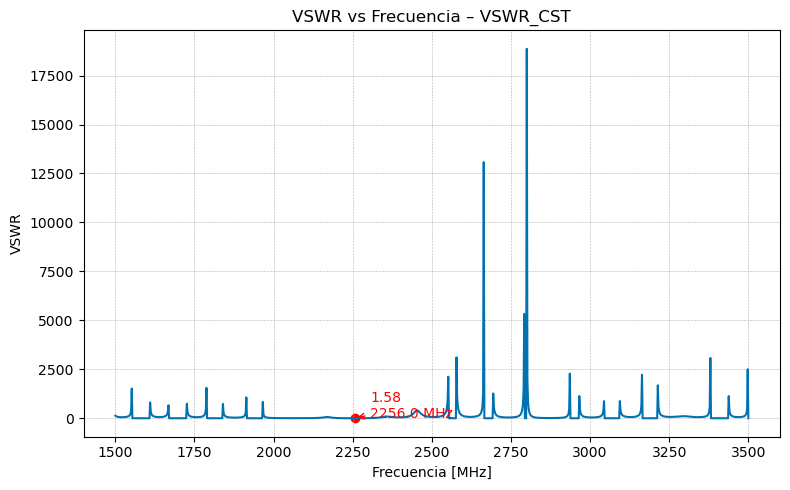

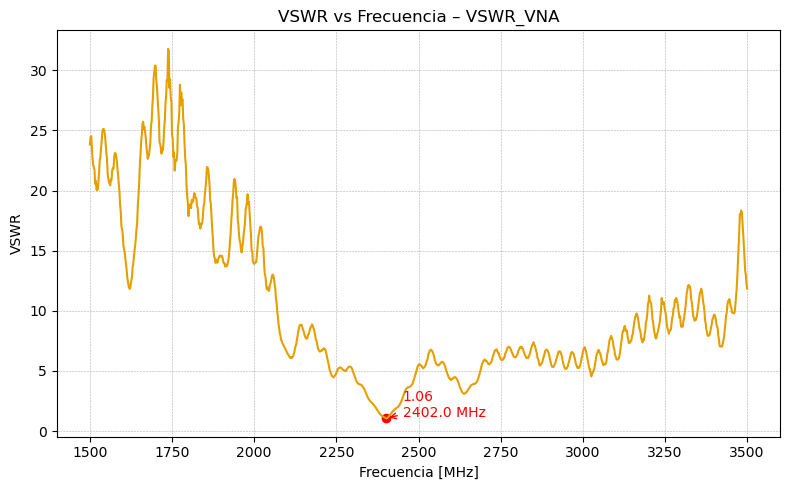

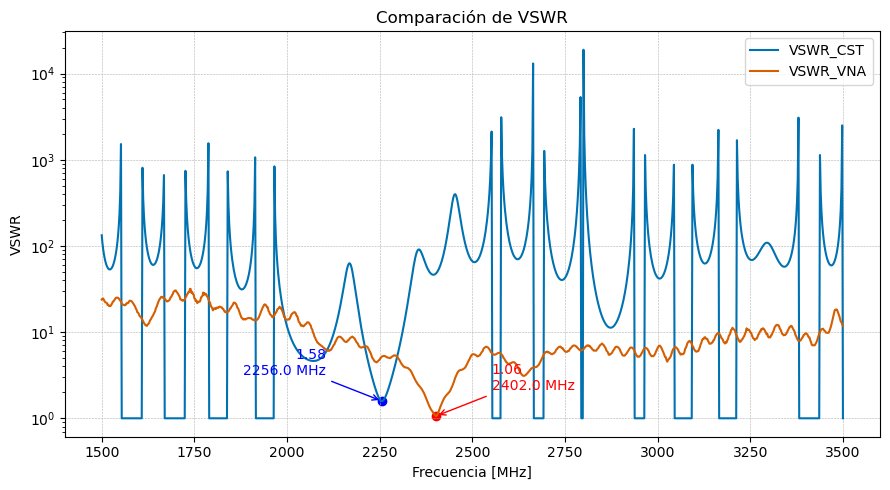

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rutas
CST_VSWR_PATH  = "D:\Facultad\Electromagnetismo_2\Antena_Patch\Antena_Patch_2.4GHz_2x2\Resultados Antena/VSWR_CST.txt"
MATP_SWR_PATH  = "D:\Facultad\Electromagnetismo_2\Antena_Patch\Antena_Patch_2.4GHz_2x2\Resultados Antena/MATP_SWR_CSV (2).csv"

# ---------- Lectura del CST ----------
freq_cst, vswr_cst = [], []
with open(CST_VSWR_PATH) as f:
    for ln in f:
        ln = ln.strip()
        if not ln or ln.startswith(("#", '"')): continue
        f_mhz, swr = ln.split("\t")[:2]
        freq_cst.append(float(f_mhz))
        vswr_cst.append(float(swr))
df_cst = pd.DataFrame({"Frequency_MHz": freq_cst, "VSWR": vswr_cst})

# ---------- Lectura del CSV ----------
freq_matp, vswr_matp, inside = [], [], False
with open(MATP_SWR_PATH) as f:
    for ln in f:
        ln = ln.strip()
        if not ln or ln.startswith("!"): continue
        if ln == "BEGIN": inside = True;  continue
        if ln == "END":   break
        if inside:
            f_hz, swr = ln.split(",")[:2]
            freq_matp.append(float(f_hz)/1e6)
            vswr_matp.append(float(swr))
df_matp = pd.DataFrame({"Frequency_MHz": freq_matp, "VSWR": vswr_matp})

# ---------- Buscar la muestra más cercana ----------
def nearest(df, target):
    idx = (df["Frequency_MHz"] - target).abs().idxmin()
    return df.loc[idx, "Frequency_MHz"], df.loc[idx, "VSWR"]

target_cst,  target_matp = 2256.0, 2402.0   # MHz
f_cst,  v_cst  = nearest(df_cst,  target_cst)
f_matp, v_matp = nearest(df_matp, target_matp)

# ---------- Individual CST ----------
plt.figure(figsize=(8,5))
plt.plot(df_cst["Frequency_MHz"], df_cst["VSWR"], color="#0072B2")
plt.scatter(f_cst, v_cst, c="red")
plt.annotate(f"{v_cst:.2f}\n{f_cst:.1f} MHz",
             (f_cst, v_cst),
             xytext=(f_cst+50, v_cst+0.1*v_cst),
             ha="left", color="red",
             arrowprops=dict(arrowstyle="->", color="red"))
plt.title("VSWR vs Frecuencia – VSWR_CST")
plt.xlabel("Frecuencia [MHz]"); plt.ylabel("VSWR")
plt.grid(True, ls="--", lw=0.4); plt.tight_layout(); plt.show()

# ---------- Individual MATP ----------
plt.figure(figsize=(8,5))
plt.plot(df_matp["Frequency_MHz"], df_matp["VSWR"], color="#E69F00")
plt.scatter(f_matp, v_matp, c="red")
plt.annotate(f"{v_matp:.2f}\n{f_matp:.1f} MHz",
             (f_matp, v_matp),
             xytext=(f_matp+50, v_matp+0.1*v_matp),
             ha="left", color="red",
             arrowprops=dict(arrowstyle="->", color="red"))
plt.title("VSWR vs Frecuencia – VSWR_VNA")
plt.xlabel("Frecuencia [MHz]"); plt.ylabel("VSWR")
plt.grid(True, ls="--", lw=0.4); plt.tight_layout(); plt.show()

# ---------- Comparativa ----------
plt.figure(figsize=(9,5))
plt.plot(df_cst["Frequency_MHz"],  df_cst["VSWR"],  label="VSWR_CST",  color="#0072B2")
plt.plot(df_matp["Frequency_MHz"], df_matp["VSWR"], label="VSWR_VNA", color="#D55E00")
plt.scatter(f_cst,  v_cst,  c="blue")
plt.annotate(f"{v_cst:.2f}\n{f_cst:.1f} MHz",
             (f_cst, v_cst),
             xytext=(f_cst-150, v_cst*2),
             ha="right", color="blue",
             arrowprops=dict(arrowstyle="->", color="blue"))
plt.scatter(f_matp, v_matp, c="red")
plt.annotate(f"{v_matp:.2f}\n{f_matp:.1f} MHz",
             (f_matp, v_matp),
             xytext=(f_matp+150, v_matp*2),
             ha="left", color="red",
             arrowprops=dict(arrowstyle="->", color="red"))
plt.yscale("log")
plt.title("Comparación de VSWR")
plt.xlabel("Frecuencia [MHz]"); plt.ylabel("VSWR")
plt.legend(); plt.grid(True, ls="--", lw=0.4); plt.tight_layout(); plt.show()
